In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn. preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras. models import load_model
from keras. layers import LSTM
from tensorflow.keras.utils import plot_model

In [ ]:
df=pd.read_csv("/content/sample_data/tesla.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
print("Dataframe Shape: ", str(df.shape))
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (2193, 6)
Null Value Present:  False


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2019-03-11,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2019-03-12,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700


<Axes: xlabel='Date'>

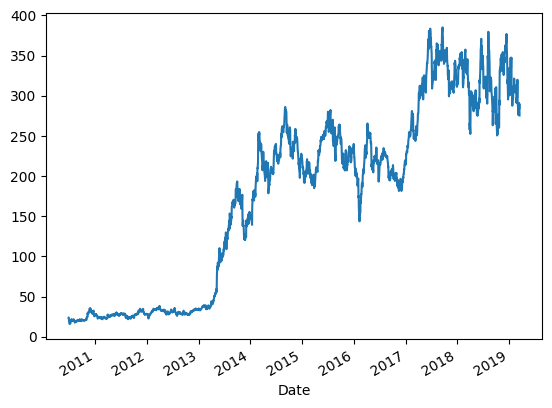

In [ ]:
df['Adj Close'].plot()

In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low','Volume']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
features = df.columns
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,-1.355662,-1.309919,-1.362964,-1.313308,-1.313308,3.012271
2010-06-30,-1.296902,-1.263730,-1.312273,-1.313827,-1.313827,2.664764
2010-07-01,-1.303738,-1.302079,-1.338938,-1.330010,-1.330010,0.691263
2010-07-02,-1.321046,-1.326111,-1.352667,-1.353895,-1.353895,0.013721
2010-07-06,-1.347008,-1.352529,-1.378013,-1.380636,-1.380636,0.393774


In [ ]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,0.007718,0.022441,0.007026,0.021912,0.021912,0.503377
2010-06-30,0.026042,0.036972,0.022834,0.021750,0.021750,0.460748
2010-07-01,0.023910,0.024908,0.014518,0.016685,0.016685,0.218659
2010-07-02,0.018513,0.017347,0.010237,0.009209,0.009209,0.135544
2010-07-06,0.010417,0.009035,0.002333,0.000840,0.000840,0.182166


In [ ]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
df.shape

(2193, 6)

In [ ]:
X_train.shape

(1994, 1, 6)

In [ ]:
X_test.shape

(199, 1, 6)

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.utils import plot_model

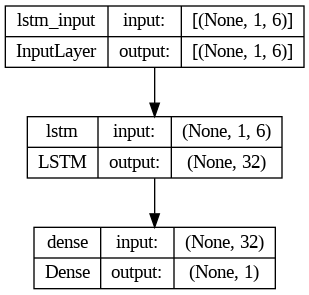

In [ ]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 5.0287
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 5.0827
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 5.2617
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 5.2529
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 5.1707
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 5.0760
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 4.9881
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 4.9114
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 4.8442
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 4.7845
Epoch 11/100
250/250 [==============================] - 1s 2ms/step - loss: 4.7297
Epoch 12/100
250/250 [==============================] - 1s 2ms/step - loss: 4.6780
Epoch 13/100


In [ ]:
y_pred= lstm.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
import math

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=math.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 squared Score :", r2)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 7.397450390562897
Mean Absolute Error: 2.0733377955500143
R2 squared Score : 0.9909027216431313
Root Mean Squared Error: 2.719825433839991


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2019-03-11,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2019-03-12,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700


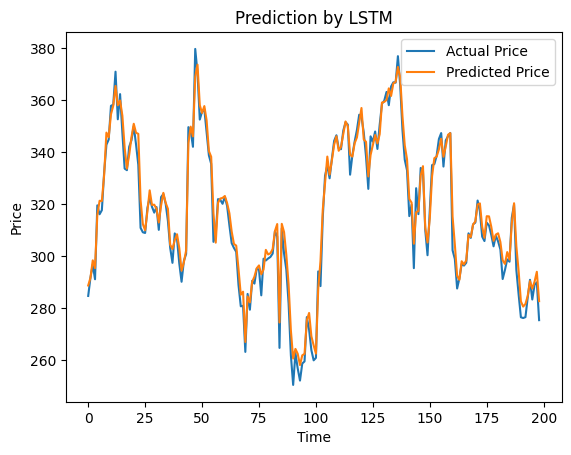

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title("Prediction by LSTM")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()